# Milestone 2 - End to End Machine Learning : Loan repayment
**Author: Hafiz Fahrurrozi**

In order to predict whether a borrower would pay in full or not, we use a dataset from LendingClub.com (the dataset can be obtained [here](https://www.kaggle.com/itssuru/loan-data)) based on their lending data from 2007-2010. We want to create a machine learning model to classify whether the borrower will repay their loan in full or not.

Column descriptions:
 - credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
 - purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").
 - int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
 - installment: The monthly installments owed by the borrower if the loan is funded.
 - log.annual.inc: The natural log of the self-reported annual income of the borrower.
 - dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
 - fico: The FICO credit score of the borrower.
 - days.with.cr.line: The number of days the borrower has had a credit line.
 - revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
 - revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
 - inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
 - delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
 - pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
 
Target description:
 - not.fully.paid: whether the borrower paid back the loan in full (1: not fully paid, 0: fully paid)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing, model_selection, feature_selection, compose, pipeline, ensemble, metrics, utils
%matplotlib inline

## Data Loading

In [2]:
raw = pd.read_csv('loan_data.csv')

### Simple data exploration

In [3]:
raw.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Aside from purpose, all columns are numeric

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


No null data based on info()

In [5]:
raw.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Here we see that there are 16% of the borrowers that didn't fully pay their loan, which tells us that the target class is imbalanced.

revolving balance are positively skewed based on their mean-median value and the distance to max value. We might need to apply transformation to reduce skewness.

## Data Cleaning

### Rename columns
To prevent error in data processing, we change column names with . to _

In [6]:
raw.columns = raw.columns.str.replace('.', '_', regex=False)
raw.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

### Reduce data skewness
we reduce data skewness in revolving balance using cube root transformation since it is positively skewed.

In [7]:
raw['revol_bal'] = np.cbrt(raw['revol_bal'])

## Data Exploration

### Correlation heatmap

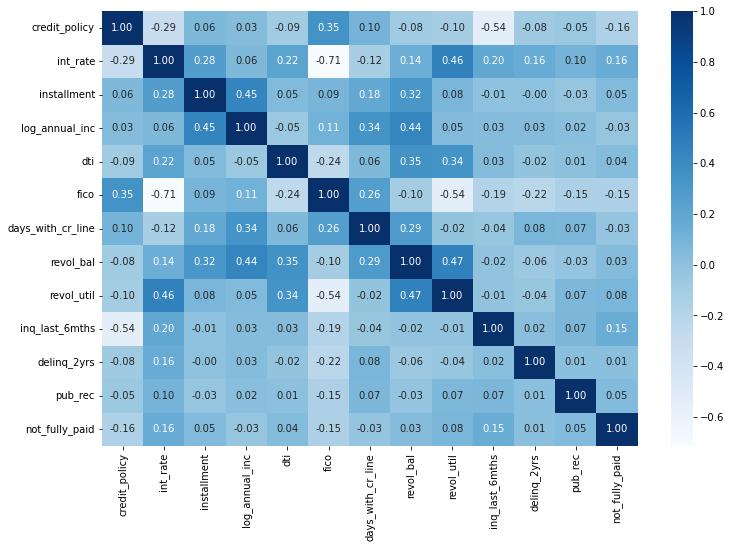

In [8]:
plt.figure(figsize=(12,8))
sn.heatmap(raw.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

Here we see that interest rate and number of inquiries by creditor are significant predictors for people not fully paying their loan. On another hand, credit policy by the company and FICO credit score of the borrower are significant predictors of people who fully paid their loan.

It might be of interest that a borrower's interest rate is significantly correlated to all other columns - except log annual income and unpaid loan balance at the end of credit cycle. As stated on the column description, borrower with higher risk of defaulting their loan are assigned with higher interest rate.

We can also see that the amount of monthly installment is positively influenced by their annual income.

### Distribution of each column

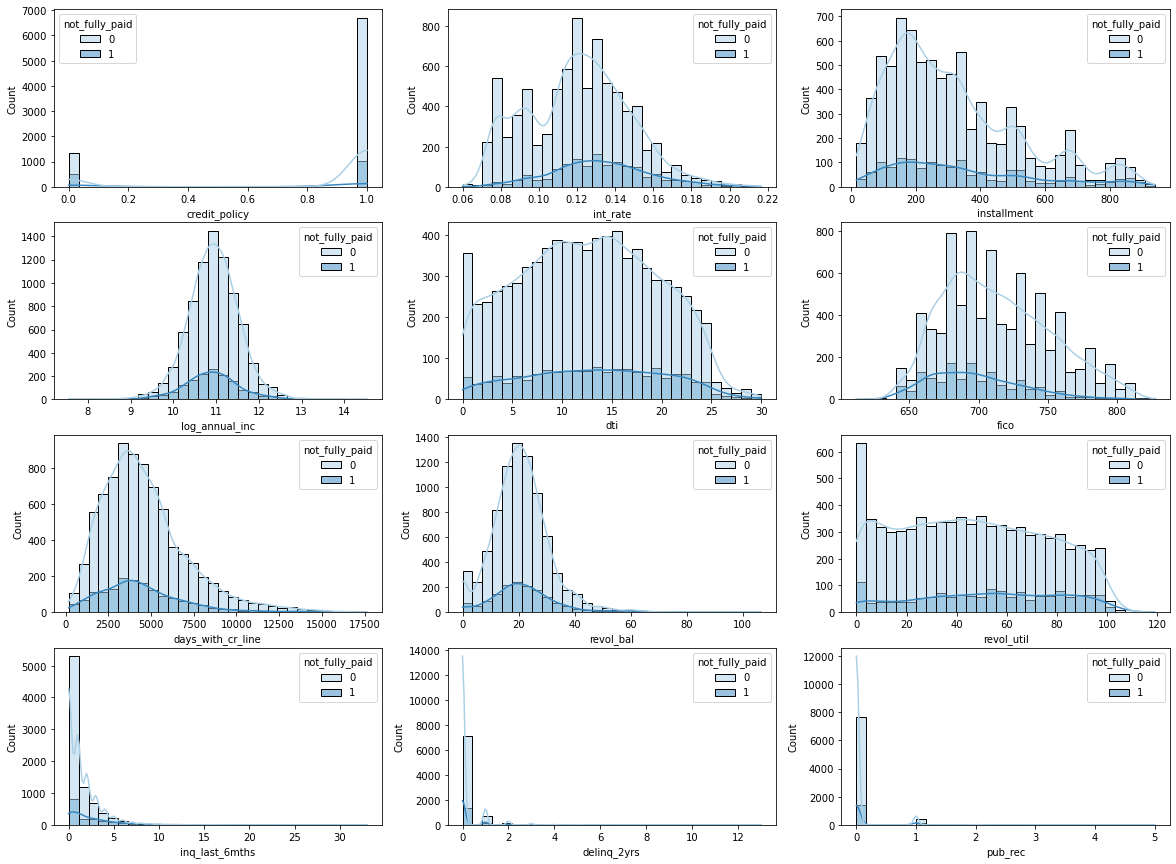

In [9]:
plt.figure(figsize=(20,15))
for i,j in zip(raw.drop(['not_fully_paid', 'purpose'],axis=1).columns, range(1,13)):
    plt.subplot(4,3,j)
    sn.histplot(data=raw, x=i, hue='not_fully_paid', bins=30, kde=True, palette='Blues')
plt.show()

Based on above graph, we can infer several insights:
 - paying borrowers have lower debt-to-income ratio, while also having lower interest rate since their risk of defaulting on their loan is lower.
 - paying borrowers have lesser utilization of their debt compared to unpaying borrowers, implying that they are spend lower credit than their limit.

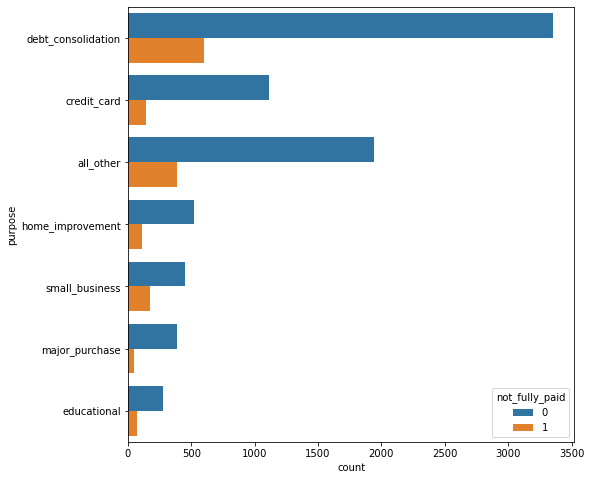

In [10]:
plt.figure(figsize=(8,8))
sn.countplot(data=raw, y='purpose', hue='not_fully_paid')
plt.show()

Most of borrowers applied their loan for debt consolidation - taking a loan to pay their other debts. Here we see that non-paying borrowers mostly originate from debt consolidation and all other reason but the highest percentage of non-paying borrower is for small business purpose.

### Target distribution

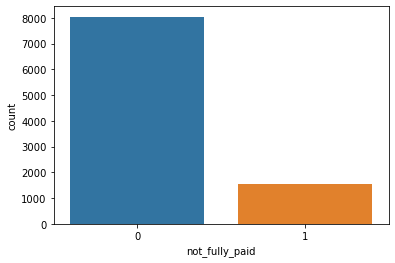

In [11]:
sn.countplot(data=raw, x='not_fully_paid')
plt.show()

The target is imbalanced, so we will resample the data and use f1, precision, and recall for evaluation.

## Data Preprocessing

### Splitting the data
We split the data into training and testing sets

In [12]:
x = raw.drop('not_fully_paid',axis=1)
y = raw['not_fully_paid']

xt,xg,yt,yg = model_selection.train_test_split(x, y, test_size=0.2, stratify=y, random_state=52)
print(xt.shape, xg.shape)

(7662, 13) (1916, 13)


### Resampling training set
Resampling the target set

In [13]:
temp = pd.concat([xt,yt], axis=1)
minor = temp[temp['not_fully_paid']==1]
major = temp[temp['not_fully_paid']==0]
mres = utils.resample(major, n_samples=minor.shape[0], replace=False, random_state=52)
minor = minor.reset_index(drop=True)
mres = mres.reset_index(drop=True)
resam = pd.concat([minor,mres],axis=0)
xtt = resam.drop('not_fully_paid',axis=1)
ytt = resam.not_fully_paid

### Model pipeline
We put the preprocessing step and the model in a single pipeline to prevent information leakage during validation.

In the transformation, we use encoding: standard scaler for numerical data and one hot encoder for categorical data. Next we use random feature elimination to select half the features relevant for the classification.

Lastly we define a random forest classifier as our classifier.

In [14]:
nfeat = ['credit_policy','int_rate','installment','log_annual_inc','dti','fico','days_with_cr_line','revol_bal','revol_util','inq_last_6mths','delinq_2yrs','pub_rec']
ntran = preprocessing.StandardScaler()

cfeat = ['purpose']
ctran = preprocessing.OneHotEncoder(handle_unknown='ignore', sparse=False)

ptr = pipeline.Pipeline([('enc',compose.ColumnTransformer(transformers=[('num', ntran, nfeat),('cat', ctran, cfeat)])),
                         ('fss',feature_selection.RFE(estimator=ensemble.RandomForestClassifier(random_state=52, n_jobs=6))),
                         ('rfc',ensemble.RandomForestClassifier(random_state=52, n_jobs=6))
                       ])

## Model Definition
We use grid search with cross-validation to tune the hyperparameter of our model. Here we only test for number of tree estimators and tree depth. Since the data is imbalanced, we use weighted f1 score to get the best model.

In [15]:
%%time
param_grid = {'rfc__n_estimators':[100, 200, 300, 400],
              'rfc__max_depth':[5,10,20,None]}
gs = model_selection.GridSearchCV(ptr, param_grid=param_grid,
                             scoring='f1_weighted', cv=model_selection.StratifiedKFold(),
                             n_jobs=6, verbose=4)
gs.fit(xtt,ytt)

model = gs.best_estimator_
print('The best parameters are:\n',gs.best_params_)
print('with a score of ', gs.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
The best parameters are:
 {'rfc__max_depth': 5, 'rfc__n_estimators': 100}
with a score of  0.6213701560302509
Wall time: 1min 45s


## Model Training
We will train two models: one with basic pipeline configuration for baseline and one with hyperparameter optimization and resampling.

We can see how our optimized model fare in evaluation and testing compared to the base model.

In [16]:
base = ptr.fit(xt,yt)

In [17]:
model.fit(xtt,ytt)

Pipeline(steps=[('enc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['credit_policy', 'int_rate',
                                                   'installment',
                                                   'log_annual_inc', 'dti',
                                                   'fico', 'days_with_cr_line',
                                                   'revol_bal', 'revol_util',
                                                   'inq_last_6mths',
                                                   'delinq_2yrs', 'pub_rec']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['purpose'])])),
                ('fss',
                 RFE(estimator=RandomForestClassifier(n_j

## Model Evaluation

First we use cross validation to measure weighted precision and recall for our base model (since the train data is still imbalanced) and precision and recall for our optimized model (since we've resampled the train data)

In [18]:
val_score = model_selection.cross_validate(base, xt, yt, scoring=['precision_weighted','recall_weighted'], n_jobs=6)
val_score_resam = model_selection.cross_validate(model, xtt, ytt, scoring=['precision','recall'], n_jobs=6)
print('No resampling:')
print(pd.DataFrame(val_score).mean())
print('\nWith resampling:')
print(pd.DataFrame(val_score_resam).mean())

No resampling:
fit_time                   14.280499
score_time                  0.095493
test_precision_weighted     0.764761
test_recall_weighted        0.835684
dtype: float64

With resampling:
fit_time          5.708890
score_time        0.044083
test_precision    0.619316
test_recall       0.631312
dtype: float64


Next we can use classification report and confusion matrix to see how both models fare with train data

In [19]:
print(metrics.classification_report(yt, base.predict(xt)))
display(metrics.confusion_matrix(yt, base.predict(xt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      1226

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662



array([[6436,    0],
       [   0, 1226]], dtype=int64)

In [20]:
print(metrics.classification_report(ytt, model.predict(xtt)))
display(metrics.confusion_matrix(ytt, model.predict(xtt)))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1226
           1       0.69      0.71      0.70      1226

    accuracy                           0.69      2452
   macro avg       0.69      0.69      0.69      2452
weighted avg       0.69      0.69      0.69      2452



array([[831, 395],
       [361, 865]], dtype=int64)

We see that our base model could predict the train data perfectly, and the optimized model have ~70% score for precision, recall, and accuracy

## Model Inference
Next we test both models on the test set we've set aside.

In [21]:
print(metrics.classification_report(yg, base.predict(xg)))
display(metrics.confusion_matrix(yg, base.predict(xg)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.60      0.03      0.06       307

    accuracy                           0.84      1916
   macro avg       0.72      0.51      0.48      1916
weighted avg       0.80      0.84      0.78      1916



array([[1603,    6],
       [ 298,    9]], dtype=int64)

In [22]:
print(metrics.classification_report(yg, model.predict(xg)))
display(metrics.confusion_matrix(yg, model.predict(xg)))

              precision    recall  f1-score   support

           0       0.89      0.58      0.70      1609
           1       0.22      0.62      0.32       307

    accuracy                           0.58      1916
   macro avg       0.55      0.60      0.51      1916
weighted avg       0.78      0.58      0.64      1916



array([[927, 682],
       [118, 189]], dtype=int64)

While the base model can predict the majority of the test set well, it fails to correctly predict the minority as seen in the f1 score of class 1.

On the other hand, the optimized model suffers lower scoring on both class but with better scoring on class 1 recall.

## Conclusion
Based on our prediction results, we can see that the optimized model fare better to predict the minority class - although at lower score overall than the base model. The optimized model would be able to predict 60% of the non-paying borrowers, but at the same time also suffers that only 20% of those prediction are truly non-paying which means there is a need to recheck those predicted as non-paying.

Our base model on the other hand can train perfectly but sufers in the test - which means that the model overfits to the training data. As seen on the report, this model can't separate non-paying borrower from paying ones at all, with only 3% non-paying borrowers correctly identified.

EDA tells us that those with higher debt-to-income ratio - which tells us that they have higher risk of defaulting - are more likely to not pay their loan in full. This is also reflected in their higher interest rate and lower FICO score. It might also be noted that a higher percentage of small businesses which applied for the loan are not paying their loan in full.